<a href="https://colab.research.google.com/github/minyou2675/Bigdata_SchoolProject/blob/main/%ED%8C%A8%EC%85%98%EB%B6%84%EB%A5%98_%EC%8B%9C%EA%B0%81%ED%99%94%ED%8F%AC%ED%95%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#모든 이미지는 컴퓨터에 숫자로 저장, 흑백이미지는 0~255 숫자로 색을 나타남, 0이 픽셀 검은색 255는 하얀색 그 중간은 회색


In [ ]:
#데이터 가져오기 
import pandas as pd # 데이터 프레임 이용한 데이터조작
import numpy as np # 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
fashion_train_df = pd.read_csv('/content/fashin-mnist_train.csv', sep = ',')

In [ ]:
fashion_test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

Visualization

In [ ]:
fashion_train_df.head() #데이터 프레임 형성되었는지 확인

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,59995,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,1,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,59997,8,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,59998,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,59999,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test_df.head()

,index,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 786)

In [ ]:
fashion_test_df.shape

(10000, 785)

In [ ]:
training = np.array(fashion_train_df, dtype = 'float32')

In [ ]:
testing = np.array(fashion_test_df, dtype = 'float32')

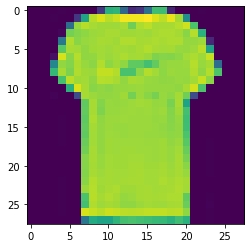

In [ ]:
plt.imshow(training[10,2:].reshape(28,28)) 
#표적열 건너뛰고 픽셀 열 부터 
#이미지 보여주기 위해 imgshow 사용/ 이미지 원래 크기인 28,28 지정

In [ ]:
import random 
i = random.randint(1, 60000) # 행에 무작위값 지정


0.0

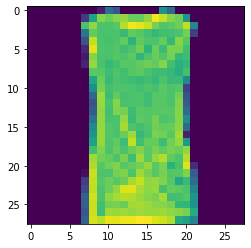

In [ ]:
label = training[i,1] #이미지와 동시에 라벨을 보여줌 
plt.imshow(training[i, 2:].reshape(28,28))
label 

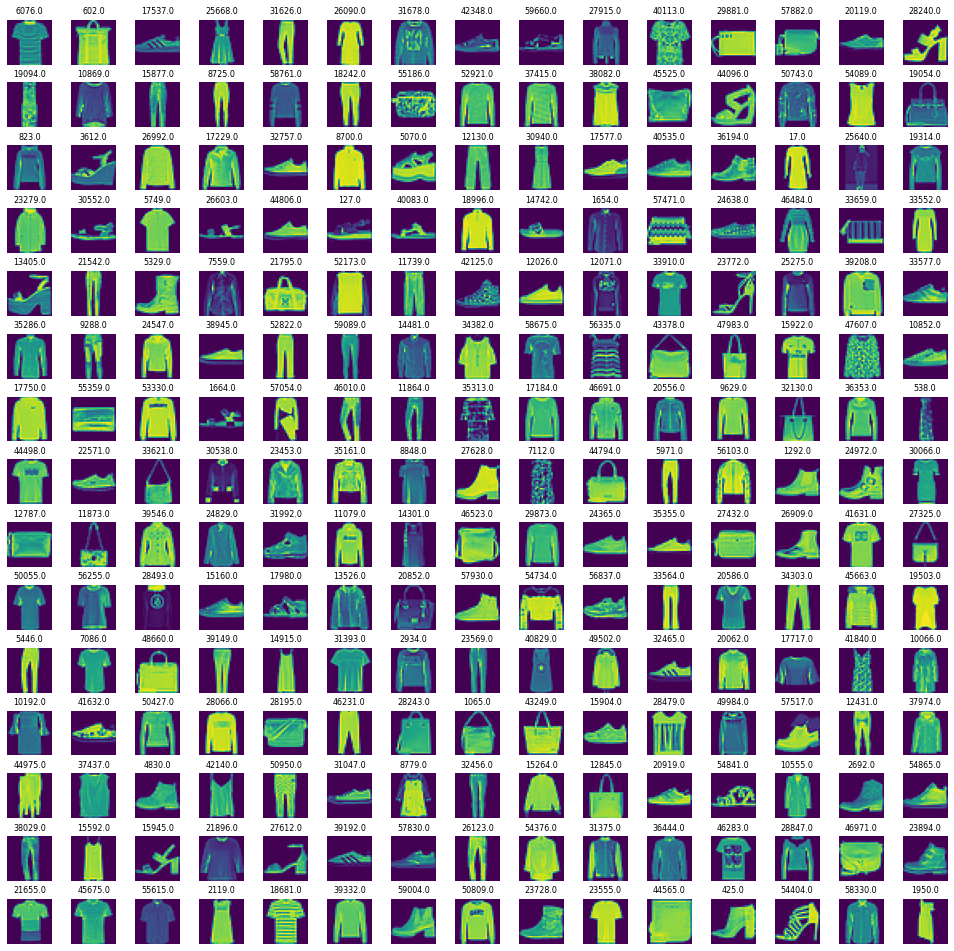

In [ ]:
W_grid = 15
L_grid = 15
#15 * 15 배열 만들기
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # 15X15 matrix를 225 배열로 
n_training = len(training)

for i in np.arange(0, W_grid * L_grid): #루프 생성 0에서 255까지 매버
  index = np.random.randint(0, n_training) #매번 무작위 변수 생성
  axes[i].imshow(training[index,2:].reshape((28,28)))
  axes[i].set_title(training[index,0], fontsize = 8) #변수의 인덱스 표시
  axes[i].axis('off') #이미지 주위에 픽셀 수 표시되는걸 방지

plt.subplots_adjust(hspace=0.4) #이미지 사이의 간격 높이 지정 

모델학습

컨볼루션 신경망 사용
인공 신경망: 인간의 신경망을 모방\
컨볼루션은 일종의 커널 행렬을 사용해 이미지를 스캔하고 제공하고 특정 효과를 얻기 위해 필터를 적용한다.\
이미지로부터 특징 추출이라는 것을 할 수 있다.
Relu 함수 적용 
주의 컨볼루션 신경망에서는 sigmoid 함수 사용을 피해야한다.
풀링의 일반적인 목표는 가장 두드러진 값 눈에 띄는 특징을 유지한채로 차원을 축소시키는 것(모델의 일반화에 도움이 된다.)
flattening은 1차원 배열로 만드는 것



In [ ]:
X_train = training[:,2:]/255
y_train = training[:,1]

In [ ]:
X_test = testing[:,1:]/255
y_test = testing[:,1]

In [ ]:
#검증데이터 세트를 사용하여 모델의 과적합을 방지
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state = 12345)
#train과 validate 변수에 0.8:0.2만큼 데이터셋을 나눠서 저장

In [ ]:
#데이터를 28,28,1로 저장
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))
#데이터들을 이미지화 

In [ ]:
X_train.shape #데이터 형태 확인 

(38400, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_validate.shape 

(9600, 28, 28, 1)

In [ ]:
import keras
from keras.models import Sequential #네트워크를 순차적인 형태로 구축하기 위함
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #컨볼루션을 위한 툴을 가져옴, Flatten은 특성 평탄화 Dropout은 드랍아웃 위해
from tensorflow.keras.optimizers import Adam #옵티마이저 선택
from keras.callbacks import TensorBoard


In [ ]:
cnn_model = Sequential()


In [ ]:
cnn_model.add(Conv2D(32,3,3,input_shape = (28, 28, 1), activation = 'relu')) #32개 커널에 크기는 3,3 입력형태는 28,28,1(이미지 크기) 활성화함수는 relu 

In [ ]:
#풀링 레이어 지정
cnn_model.add(MaxPooling2D(pool_size = (2,2))) #크기를 2,2로 지정 


In [ ]:
cnn_model.add(Flatten()) #평탄화 작업

In [ ]:
cnn_model.add(Dense(32, activation = 'relu')) #입력과 출력 사이에 포함시키는 입력 레이어 지정 

In [ ]:
cnn_model.add(Dense(10, activation = 'sigmoid')) #표적값인 10개의 클래스 중에서 출력시키기 위해 sigmoid로 함수 지정 

학습지정

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])
#Adam 옵티마이저를 써서 측정치에 정확도를 지정, 손실함수는 희귀 범주 교차 엔트로피 ,  교차범주를 사용하는 건 데이터 세트를 10개 샘플로 범주화하기 위해


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#에포크는 학습 데이터 세트를 표현하고 제시하면서 가중치를 갱신할 횟수
epochs = 50

In [ ]:
cnn_model.fit(X_train, y_train, batch_size = 512,epochs = 50, verbose = 1, validation_data = (X_validate, y_validate)) #모델 적합시키기 

Epoch 1/50
75/75 [==============================] - 2s 24ms/step - loss: 1.5997 - accuracy: 0.4759 - val_loss: 0.8942 - val_accuracy: 0.7050
Epoch 2/50
75/75 [==============================] - 2s 22ms/step - loss: 0.7520 - accuracy: 0.7371 - val_loss: 0.6751 - val_accuracy: 0.7599
Epoch 3/50
75/75 [==============================] - 2s 22ms/step - loss: 0.6357 - accuracy: 0.7709 - val_loss: 0.5942 - val_accuracy: 0.7857
Epoch 4/50
75/75 [==============================] - 2s 22ms/step - loss: 0.5841 - accuracy: 0.7890 - val_loss: 0.5506 - val_accuracy: 0.8017
Epoch 5/50
75/75 [==============================] - 2s 22ms/step - loss: 0.5489 - accuracy: 0.8008 - val_loss: 0.5234 - val_accuracy: 0.8141
Epoch 6/50
75/75 [==============================] - 2s 22ms/step - loss: 0.5260 - accuracy: 0.8090 - val_loss: 0.5023 - val_accuracy: 0.8197
Epoch 7/50
75/75 [==============================] - 2s 22ms/step - loss: 0.5081 - accuracy: 0.8165 - val_loss: 0.4909 - val_accuracy: 0.8250
Epoch 8/50
75

모델 평가하기 

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy : {:.3f}", format(evaluation[1])) #테스트 셋을 이용하여 정확도를 측정하고, 모델의 정확도를 프린트 

313/313 [==============================] - 1s 2ms/step - loss: 8.1364 - accuracy: 0.1015
Test Accuracy : {:.3f} 0.1014999970793724


기존 모델보다 정확성이 떨어짐. 이유는 처음 접하는 데이터셋이기 때문

In [ ]:
predicted_classes = (cnn_model.predict(X_test) > 0.5).astype("float32")

In [ ]:
predicted_classes

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

TypeError: ignored

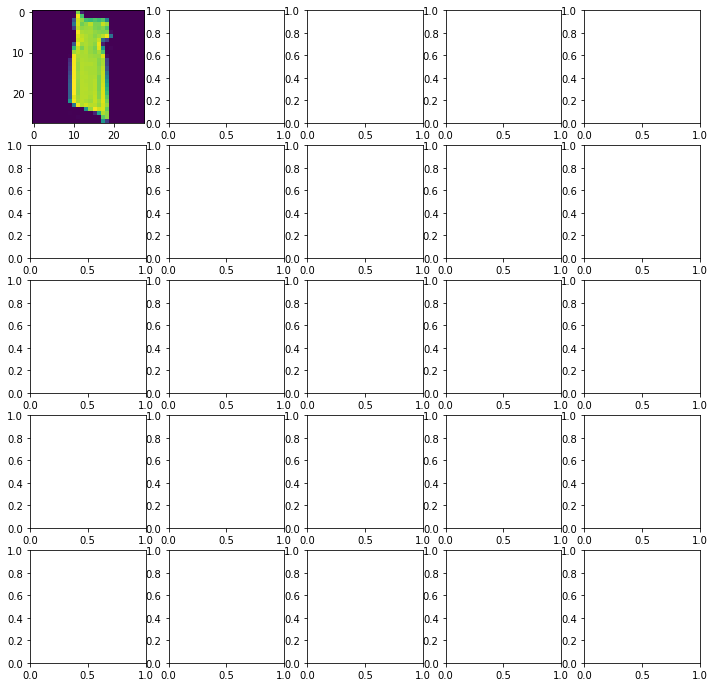

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12)) # 12x12 크기
axes = axes.ravel() # 15X15 matrix를 225 배열로 #axis 배열 평탄화


for i in np.arange(0, L * W): #루프 생성 0에서 25까지 for루프 지정
  
  axes[i].imshow(training[index,2:].reshape((28,28))) #이미지 크기 28*28로
  axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i])) #예측이 얼마나 잘 되는지
  axes[i].axis('off') #이미지 주위에 픽셀 수 표시되는걸 방지

plt.subplots_adjust(wspace=0.4) #이미지 사이의 폭을 지정 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes) #혼동행렬 생성
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = 'True') #seaborn library 이용 제대로 분류 했는지 시각적으로 확인


ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10 #a모든 표적 이름을 불러옴 
target_names = ["Class {}".format(i) for i in range(num_classes)] #루프를 지정하여 10개의 표적을 분류하여 레포트를 출력

print(classification_report(y_test, predicted_classes, target_names = target_names))

드랍아웃은 더 나은 방향을 위해 학습을 방해하는 것, 신경망의 과적합을 방지하기 위한 정규화 기법